# DSCI 503 - Project 04
### Justin Dickson

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Part 1: Loading the Dataset; Preliminary Analysis
We will now load the data and explore its structure.

In [2]:
fc = pd.read_csv('forest_cover.txt', sep='\t')
fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


We will now determine the size of the dataset.

In [3]:
print(fc.shape)

(15120, 13)


Distribution of cover types.

In [4]:
fc.loc[:,'Cover_Type'].value_counts().sort_index()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

List of colors to be used in the plots.

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area
We will explore the relationship between cover type and wilderness area.

In [6]:
fc.loc[:,'Wilderness_Area'].value_counts().sort_index()

Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

Creating DataFrame to determine how many regions of each cover type are in each wilderness area.

In [7]:
ct_by_wa = pd.crosstab(fc.loc[:,'Cover_Type'],fc.loc[:,'Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


Stacked bar chat of the above information.

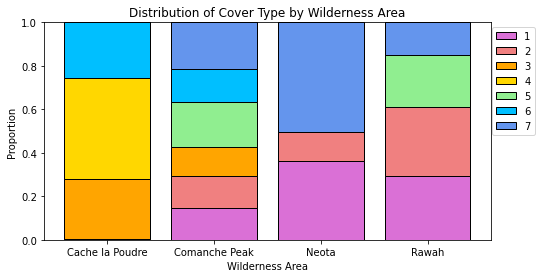

In [8]:
ct_by_wa_props = (ct_by_wa / ct_by_wa.sum())
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props

plt.figure(figsize=[8,4])

for i in range(0,len(ct_by_wa_props)):
    plt.bar(['Cache la Poudre','Comanche Peak','Neota','Rawah'],np.array(ct_by_wa_props.iloc[i]), 
            label=ct_by_wa_props.index[i], bottom=np.array(bb.iloc[i]), color=palette[i], edgecolor='k')

plt.legend(loc="upper right", bbox_to_anchor=(1.11,1))
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.show()

## Part 3: Distribution of Cover Type by Soil Type
We will now explore the relationship between cover type and soil type. We will start by creating a DataFrame to determine the number of regions of each cover type there are for each of the 40 soil types.

In [9]:
ct_by_st = pd.crosstab(fc.loc[:,'Cover_Type'], fc.loc[:,'Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


Below is a visual representation of the information in the DataFrame above in the form of a stacked bar chart.

In [10]:
ct_by_st.iloc[:,:20]

Soil_Type,1,2,3,4,5,6,8,9,10,11,12,13,14,16,17,18,19,20,21,22
Cover_Type,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,24,17,0,9,2,0,15,41,12,275
2,0,3,12,20,0,7,1,9,81,67,203,84,0,14,7,16,13,55,0,54
3,121,283,133,462,55,248,0,0,717,89,0,4,4,5,34,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,0,0,128,40,350,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,0,305,0,9,131,44,18,6,0,0
6,95,182,18,87,71,151,0,0,1101,67,0,66,37,37,88,0,0,37,0,0
7,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,16


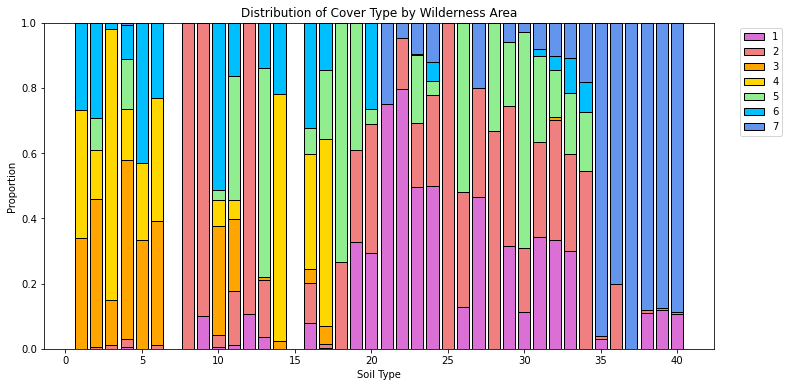

In [11]:
ct_by_st_props = (ct_by_st / ct_by_st.sum())
bb = np.cumsum(ct_by_st_props) - ct_by_st_props

plt.figure(figsize=[12,6])

for i in range(0,len(ct_by_wa_props)):
    plt.bar(ct_by_st.columns.values,np.array(ct_by_st_props.iloc[i]), 
            label=ct_by_st_props.index[i], bottom=np.array(bb.iloc[i]), color=palette[i], edgecolor='k')

plt.legend(loc="upper right", bbox_to_anchor=(1.11,1))
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.show()

## Part 4: Distribution of Elevation by Cover Type
We will now explore the relationship between cover type and elevation. We will start by calculating the average elevation for each of the seven cover types.

In [12]:
ct_avg_ev = fc.loc[:,['Elevation','Cover_Type']].groupby(by='Cover_Type').mean()
ct_avg_ev

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


We will now create histograms to visually explore the distribution of elevations for each of the seven cover types.

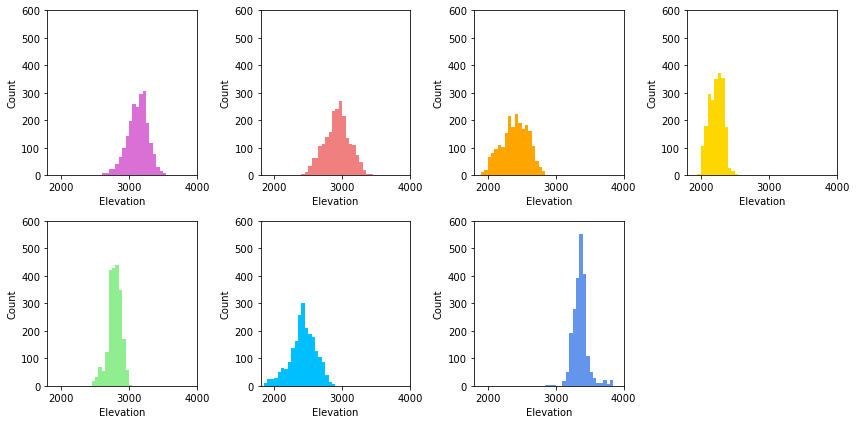

In [13]:
plt.figure(figsize=[12,6])

for i in range(0,len(ct_avg_ev)):
    plt.subplot(2,4,i+1)
    plt.hist([fc.Elevation.values[fc.Cover_Type == i+1]], bins=np.arange(1800, 4050, 50), color=palette[i])
    plt.xlim([1800,4000])
    plt.ylim([0,600])
    plt.xlabel('Elevation')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets
We will now encode our categorical variables and create training, validation, and test sets. We will start by separating the categorical features, numerical features, and labels.

In [14]:
X_num = fc.iloc[:,:10].values
X_cat = fc.iloc[:,10:12].values
y = fc.iloc[:,12].values

print(f'Numerical Feature Array Shape:\t {X_num.shape}')
print(f'Categorical Feature Array Shape: {X_cat.shape}')
print(f'Label Array Shape:\t\t {y.shape}')

Numerical Feature Array Shape:	 (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape:		 (15120,)


We will now encode the categorical variables using one-hot encoding.

In [15]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_cat)
X_enc = encoder.transform(X_cat)

print(f'Encoded Feature Array Shape: {X_enc.shape}')

Encoded Feature Array Shape: (15120, 42)


We will now combine the numerical features and the encoded features.

In [16]:
X = np.hstack([X_num, X_enc])

print(f'Feature Array Shape: {X.shape}')

Feature Array Shape: (15120, 52)


We will now split the data into training, validation, and test sets using a 70/15/15 split.

In [17]:
X_train, X_hold, y_train, y_hold = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold,y_hold,test_size=0.5,random_state=1,stratify=y_hold)

print(f'Training Features Shape:{X_train.shape}')
print(f'Validation Features Shape:{X_valid.shape}')
print(f'Test Feature Shape:{X_test.shape}')

Training Features Shape:(10584, 52)
Validation Features Shape:(2268, 52)
Test Feature Shape:(2268, 52)


## Part 6: Logistic Regression Model
We will now create and evaluate a logistic regression model.

In [18]:
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial', penalty='none')
lr_mod.fit(X_train,y_train)

print(f'Training Accuracy:\t{lr_mod.score(X_train,y_train):.4f}')
print(f'Validation Accuracy:\t{lr_mod.score(X_valid,y_valid):.4f}')

Training Accuracy:	0.6069
Validation Accuracy:	0.6111


C:\Users\Justin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part 7: Decision Tree Models
We will now create and evaluate several decision tree models.

In [19]:
dt_train_acc = []
dt_valid_acc = []

depth_range = range(2,30)

for i in depth_range:
    np.random.seed(1)
    
    temp_tree = DecisionTreeClassifier(max_depth=i)
    temp_tree.fit(X_train,y_train)
    
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))

dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]

print(f'Optimal value for max_depth:\t\t{dt_opt_depth}')
print(f'Training Accuracy for Optimal Model:\t{dt_train_acc[dt_idx]:.4f}')
print(f'Validation Accuracy for Optimal Model:\t{dt_valid_acc[dt_idx]:.4f}')

Optimal value for max_depth:		18
Training Accuracy for Optimal Model:	0.9804
Validation Accuracy for Optimal Model:	0.7720


We will now plot the training and validation curves as a function of max_depth.

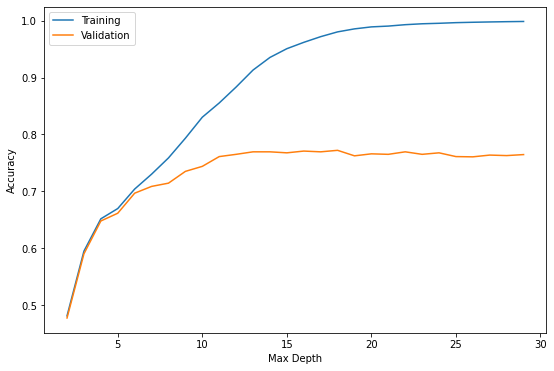

In [20]:
plt.figure(figsize=([9,6]))
plt.plot(depth_range, dt_train_acc, label='Training')
plt.plot(depth_range, dt_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 8: Random Forest Models
We will now create and evaluate several random forest models.

In [21]:
rf_train_acc = []
rf_valid_acc = []

for i in depth_range:
    np.random.seed(1)
    
    temp_forest = RandomForestClassifier(max_depth=i, n_estimators=100)
    temp_forest.fit(X_train,y_train)
    
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))
    
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

print(f'Optimal value for max_depth:\t\t{rf_opt_depth}')
print(f'Training Accuracy for Optimal Model:\t{rf_train_acc[rf_idx]:.4f}')
print(f'Validation Accuracy for Optimal Model:\t{rf_valid_acc[rf_idx]:.4f}')

Optimal value for max_depth:		28
Training Accuracy for Optimal Model:	1.0000
Validation Accuracy for Optimal Model:	0.8677


We will now plot the training and validation curves as a function of max_depth.

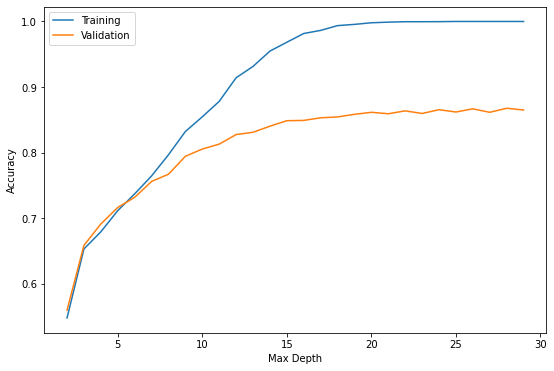

In [22]:
plt.figure(figsize=([9,6]))
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 9: Create and Evaluate Final Model
For our final model we will use our Random Forest model with a max depth of 28 as it had a validation accuracy of 86.77%.

In [23]:
np.random.seed(1)

final_model = RandomForestClassifier(max_depth=28, n_estimators=100)
final_model.fit(X_train,y_train)

print(f'Training Accuracy for Final Model:\t{final_model.score(X_train, y_train):.4f}')
print(f'Validation Accuracy for Final Model:\t{final_model.score(X_valid, y_valid):.4f}')
print(f'Testing Accuracy for Final Model:\t{final_model.score(X_test, y_test):.4f}')

Training Accuracy for Final Model:	1.0000
Validation Accuracy for Final Model:	0.8677
Testing Accuracy for Final Model:	0.8593


We will now create a confusion matrix detailing the model's performance on the test set.

In [24]:
test_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, test_pred)
cm_df = pd.DataFrame(cm, columns=[ct_avg_ev.index], index=[ct_avg_ev.index])
cm_df

Cover_Type,1,2,3,4,5,6,7
Cover_Type,,,,,,,
1,236,63,2,0,5,0,18
2,53,239,6,0,13,10,3
3,0,2,262,18,2,40,0
4,0,0,6,313,0,5,0
5,0,11,4,0,305,4,0
6,0,0,33,11,1,279,0
7,8,1,0,0,0,0,315


We wil now generate a classification report to provide further insight into the model's performance on the test set.

In [25]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.79      0.73      0.76       324
           2       0.76      0.74      0.75       324
           3       0.84      0.81      0.82       324
           4       0.92      0.97      0.94       324
           5       0.94      0.94      0.94       324
           6       0.83      0.86      0.84       324
           7       0.94      0.97      0.95       324

    accuracy                           0.86      2268
   macro avg       0.86      0.86      0.86      2268
weighted avg       0.86      0.86      0.86      2268

